In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
accident_data = pd.read_csv("C:\\Users\\pavon\\Documents\\BDMG-vehicle-accidents\\datasets\\US_Accidents_March23\\US_Accidents_March23.csv")

In [ ]:
#EDA
#print number and percentage of null entries per variable
print('Null values per variable')
for column in accident_data.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(accident_data[column]).sum(),(pd.isnull(accident_data[column]).sum()/len(accident_data))*100))

Null values per variable
ID: 0 (0.0%)
Source: 0 (0.0%)
Severity: 0 (0.0%)
Start_Time: 0 (0.0%)
End_Time: 0 (0.0%)
Start_Lat: 0 (0.0%)
Start_Lng: 0 (0.0%)
End_Lat: 3402762 (44.02935461106149%)
End_Lng: 3402762 (44.02935461106149%)
Distance(mi): 0 (0.0%)
Description: 5 (6.469649451102002e-05%)
Street: 10869 (0.1406372397680553%)
City: 253 (0.003273642622257613%)
County: 0 (0.0%)
State: 0 (0.0%)
Zipcode: 1915 (0.024778757397720667%)
Country: 0 (0.0%)
Timezone: 7808 (0.10103004582840884%)
Airport_Code: 22635 (0.2928810306513876%)
Weather_Timestamp: 120228 (1.5556660284141828%)
Temperature(F): 163853 (2.1201429430228327%)
Wind_Chill(F): 1999019 (25.86590435218494%)
Humidity(%): 174144 (2.253301268025414%)
Pressure(in): 140679 (1.820287630263157%)
Visibility(mi): 177098 (2.291523956982524%)
Wind_Direction: 175206 (2.2670428034595544%)
Wind_Speed(mph): 571233 (7.391354529802699%)
Precipitation(in): 2203586 (28.512857910712107%)
Weather_Condition: 173459 (2.244437848277404%)
Amenity: 0 (0.0%)


In [ ]:
#EDA
#look at distribution of data
accident_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [ ]:
#EDA
#checking to see if the missing end lat/long are due having same start lat/long
accident_data[(accident_data.Start_Lat == accident_data.End_Lat) & (accident_data.Start_Lng == accident_data.End_Lng)]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3402797,A-3412680,Source1,2,2016-02-09 08:18:58,2016-02-09 14:18:58,39.860250,-85.966230,39.860250,-85.966230,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402822,A-3412705,Source1,3,2016-02-10 09:08:29,2016-02-10 15:08:29,38.271910,-85.808380,38.271910,-85.808380,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402865,A-3412748,Source1,2,2016-02-11 08:47:51,2016-02-11 14:47:51,38.336670,-81.656230,38.336670,-81.656230,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402876,A-3412759,Source1,2,2016-02-11 13:25:43,2016-02-11 19:25:43,41.256660,-81.631570,41.256660,-81.631570,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3402877,A-3412760,Source1,2,2016-02-11 13:30:58,2016-02-11 19:30:58,40.589190,-80.098850,40.589190,-80.098850,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728356,A-7777724,Source1,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.0,...,False,False,False,False,False,False,Night,Night,Night,Night
7728370,A-7777738,Source1,2,2019-08-23 15:24:47,2019-08-23 15:54:05,34.629366,-118.153009,34.629366,-118.153009,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
7728383,A-7777751,Source1,2,2019-08-23 16:43:59,2019-08-23 17:13:32,34.120911,-117.833454,34.120911,-117.833454,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
7728385,A-7777753,Source1,2,2019-08-23 17:40:12,2019-08-23 18:08:35,33.943599,-117.077880,33.943599,-117.077880,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
#EDA
#check to see if missing values are in same rows
accident_data[np.logical_xor(accident_data.End_Lat.isna(),accident_data.End_Lng.isna()) == True]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [ ]:
#EDA
#look through some of the variables with low number of unique entries
#Side has ' '
#Wind direction has repeats with different spellings
#Weather condition has some repeats (e.g., 'heavy rain shower' and 'heavy rain showers')
for col in accident_data.columns:
    print('{}: {}'.format(col,accident_data[col].unique()))

ID: ['A-1' 'A-2' 'A-3' ... 'A-7777759' 'A-7777760' 'A-7777761']
Source: ['Source2' 'Source3' 'Source1']
Severity: [3 2 1 4]
Start_Time: ['2016-02-08 05:46:00' '2016-02-08 06:07:59' '2016-02-08 06:49:27' ...
 '2019-08-23 19:11:30' '2019-08-23 19:00:21' '2019-08-23 18:52:06']
End_Time: ['2016-02-08 11:00:00' '2016-02-08 06:37:59' '2016-02-08 07:19:27' ...
 '2019-08-23 19:28:49' '2019-08-23 19:29:42' '2019-08-23 19:21:31']
Start_Lat: [39.865147 39.928059 39.063148 ... 34.120911 33.943599 34.239104]
Start_Lng: [ -84.058723  -82.831184  -84.032608 ... -118.416176 -117.14806
 -117.84779 ]
End_Lat: [      nan 40.11206  39.86501  ... 33.943599 34.239104 33.98311 ]
End_Lng: [        nan  -83.03187   -84.04873  ... -118.416176 -118.39565
 -117.23934 ]
Distance(mi): [1.0000e-02 0.0000e+00 1.3200e+00 ... 1.1622e+01 2.0246e+01 3.6350e+01]
Description: ['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Acci

In [ ]:
#EDA
#create dataframe of variables collected at airport for airport_code with null values (i.e., no airport information)
weather_info = accident_data[accident_data.Airport_Code.isna()][['Airport_Code','Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]

In [ ]:
#EDA
#all records that are missing an airport_code are also missing weather information
print('Percentage null when Airport_Code is null:')
for weather in weather_info.columns:
    print('{}: {}%'.format(weather, (weather_info[weather].isna().count()/weather_info.Airport_Code.isna().count())*100))

Percentage null when Airport_Code is null:
Airport_Code: 100.0%
Weather_Timestamp: 100.0%
Temperature(F): 100.0%
Wind_Chill(F): 100.0%
Humidity(%): 100.0%
Pressure(in): 100.0%
Visibility(mi): 100.0%
Wind_Direction: 100.0%
Wind_Speed(mph): 100.0%
Precipitation(in): 100.0%
Weather_Condition: 100.0%


In [ ]:
#null percipitation values are not necessarily due to no rain
accident_data[accident_data['Precipitation(in)'] == 0]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
23,A-24,Source2,3,2016-02-08 12:00:00,2016-02-08 12:45:00,40.023487,-82.994888,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
26,A-27,Source2,2,2016-02-08 12:52:05,2016-02-08 13:37:05,39.733219,-84.159653,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
27,A-28,Source2,2,2016-02-08 14:24:48,2016-02-08 15:09:48,39.775303,-84.200523,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
30,A-31,Source2,2,2016-02-08 16:16:08,2016-02-08 16:46:08,40.081459,-83.122398,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
#looking for cases where Humidity is zero and Percipitation is null (i.e., precipitation should be set to zero)
accident_data[[a and b for a,b in zip(accident_data['Humidity(%)'] == 0,accident_data['Precipitation(in)'].isna())]][['Humidity(%)','Precipitation(in)']]

,Humidity(%),Precipitation(in)


In [ ]:
#looking for cases where wind speed is zero and wind direction is null (i.e., no wind to have a wind direction)
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Direction'].isna())]][['Wind_Speed(mph)','Wind_Direction']]

,Wind_Speed(mph),Wind_Direction


In [ ]:
#looking to see if wind_speed is zero, is wind_chill null
#for these records, null wind_chill entries should be replaced with temperature
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
469846,0.0,NaN
507288,0.0,NaN
507359,0.0,NaN
507368,0.0,NaN
507372,0.0,NaN
...,...,...
7719455,0.0,NaN
7721117,0.0,NaN
7721282,0.0,NaN
7724877,0.0,NaN


In [ ]:
#looking to see if wind_speed is zero if there is a wind chill
accident_data[[a and not b for a,b in zip(accident_data['Wind_Speed(mph)'] == 0,accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
43488,0.0,70.0
44266,0.0,63.0
44410,0.0,65.0
44568,0.0,84.0
44570,0.0,84.0
...,...,...
7728358,0.0,64.0
7728361,0.0,81.0
7728364,0.0,82.0
7728375,0.0,82.0


In [ ]:
#looking for null values in both wind speed and wind chill
accident_data[[a and b for a,b in zip(accident_data['Wind_Speed(mph)'].isna(),accident_data['Wind_Chill(F)'].isna())]][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
0,NaN,NaN
1,NaN,NaN
33,NaN,NaN
90,NaN,NaN
95,NaN,NaN
...,...,...
7728156,NaN,NaN
7728162,NaN,NaN
7728250,NaN,NaN
7728305,NaN,NaN


In [4]:
#for reference when categorizing based on numerical and categorical
accident_data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
#categorized variables based on numerical, categoric, and datetime
#description is excluded

numerical = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Number','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]

categorical = [
    'Severity','Street', 'City', 'Zipcode', 'County', 'State','Country','Timezone','Airport_Code','Wind_Direction','Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'
]

datetime = [
        'datetime_start_parsed', 'datetime_end_parsed', 'datetime_weathertime_parsed'
]

In [5]:
#since dataset is over 1 GB, taking a sample of 1% of data for analysis
accident_sample = accident_data.sample(int(len(accident_data)/100))
print('Percentage of data sampled: {}%'.format((len(accident_sample)/len(accident_data))*100))

Percentage of data sampled: 0.9999878370590319%


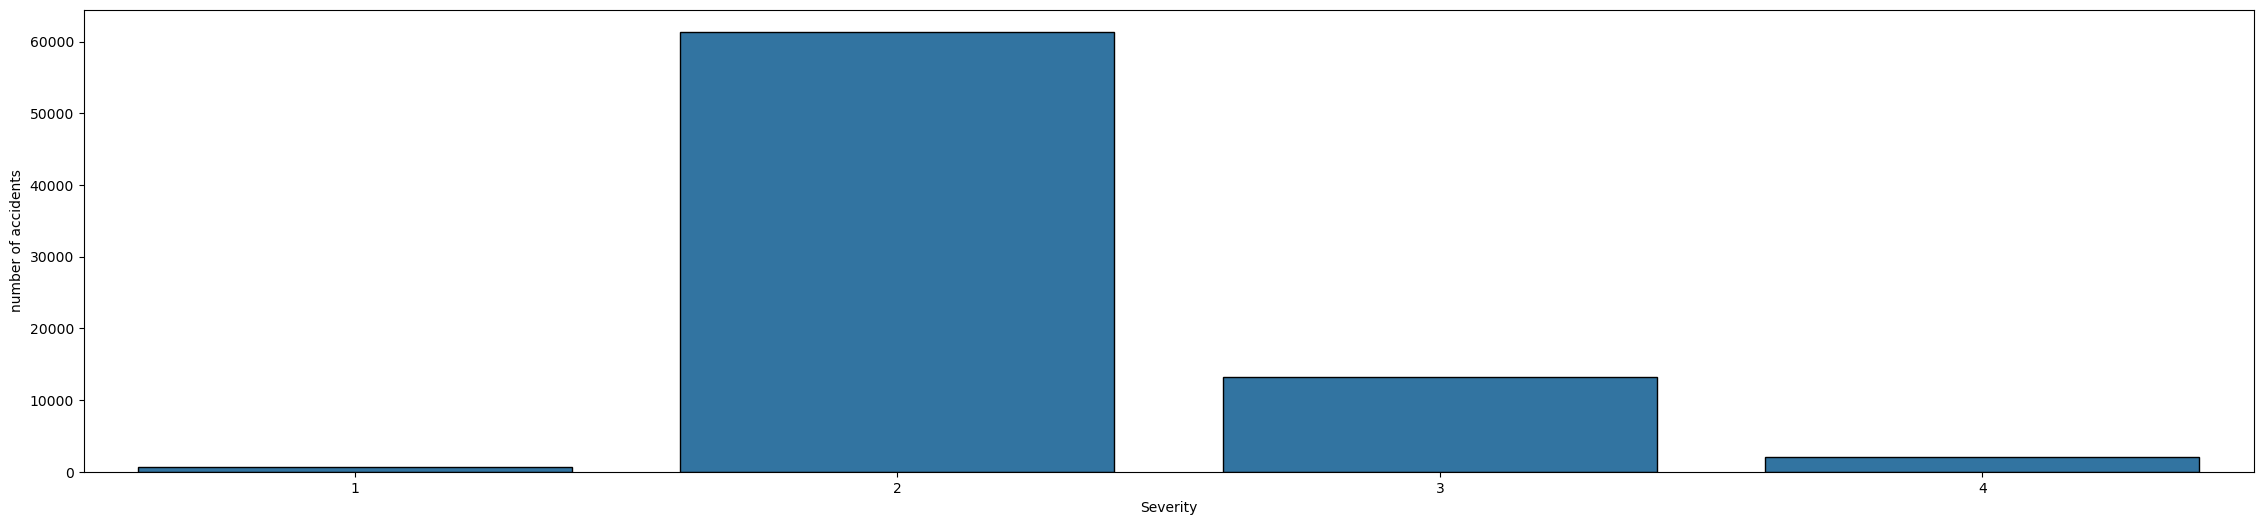

KeyboardInterrupt: 

In [11]:
#histograms for categorical data
for i in accident_sample[categorical].columns:
    plt.figure(figsize=(28, 6))
    sns.barplot(edgecolor='black',x=accident_sample[categorical][i].value_counts().index,y=accident_sample[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#re-plotting top 20 of difficult to see plots
cat_top10 = ['Street','City', 'Zipcode', 'County', 'Airport_Code', 'Weather_Condition']
for i in cat_top10:
    cat_grouped = accident_sample.groupby(i)['ID'].nunique().nlargest(20)
    plt.figure(figsize=(28, 6))
    sns.barplot(edgecolor='black',x=cat_grouped.index,y=cat_grouped)
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for numerical data
for i in accident_sample[numerical].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[numerical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for day datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.day, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} day'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for month datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.month, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} month'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for year datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.year, edgecolor='black', align='left', rwidth=0.5, bins=[2016, 2017,2018,2019,2020, 2021])
    plt.xlabel('{} year'.format(i))
    plt.xticks(ticks=[2016, 2017,2018,2019,2020, 2021])
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for hour datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.hour, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} hour'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for minute datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.minute, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} minute'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#histograms for second datetime data
for i in accident_sample[datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(accident_sample[datetime][i].dt.second, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} second'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [ ]:
#creating a dataframe for creating a correlation heatmap
numerical_heatmap = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]

accident_numerical_datetime = accident_data[numerical_heatmap]

#seperating dates and times into seperate columns
for col in ['datetime_start_parsed', 'datetime_end_parsed']:
    accident_numerical_datetime['{} day'.format(col)] = accident_data[col].dt.day
    accident_numerical_datetime['{} month'.format(col)] = accident_data[col].dt.month
    accident_numerical_datetime['{} year'.format(col)] = accident_data[col].dt.year
    accident_numerical_datetime['{} hour'.format(col)] = accident_data[col].dt.hour
    accident_numerical_datetime['{} minute'.format(col)] = accident_data[col].dt.minute
    accident_numerical_datetime['{} second'.format(col)] = accident_data[col].dt.second

In [7]:
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(20, 20))
sns.heatmap(accident_numerical_datetime.corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12);

NameError: name 'accident_numerical_datetime' is not defined

<Figure size 2000x2000 with 0 Axes>

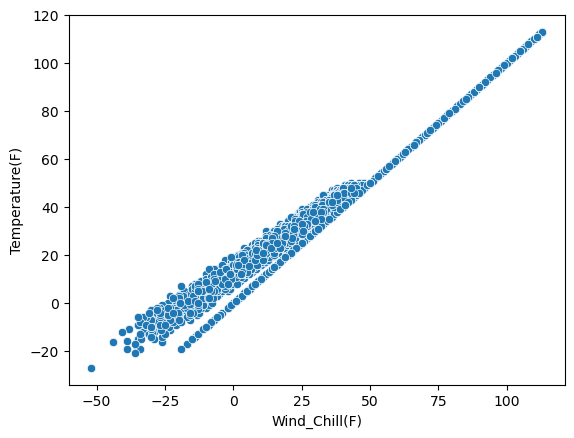

In [6]:
#temperature and wind chill have a 0.99 correlation
#since this dataset is combined from two sources, it looks like each had different methods for recording temperature and wind chill
accident_sample = accident_data.sample(int(len(accident_data)/100))
sns.scatterplot(x='Wind_Chill(F)', y='Temperature(F)', data=accident_sample, palette='Set1')
plt.show()

In [12]:
#import geopandas and geoplot libraries
import geopandas
import geoplot as gplt
import geoplot.crs as gcrs

In [ ]:
#create dataframe of variables I'm interested in looking at on a map plus lat/lng variables
severity_locations = accident_data[['Temperature(F)','Wind_Chill(F)','Severity','Start_Lng','Start_Lat']]

In [ ]:
#create a GeoDataFrame
gdf_severity = geopandas.GeoDataFrame(
    severity_locations, geometry=geopandas.points_from_xy(severity_locations.Start_Lng, severity_locations.Start_Lat))

In [ ]:
#generate map with hue based on severity
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample.Severity, scale=gdfs_sample.Severity, legend=True, legend_var='hue')
plt.show()

In [ ]:
#generate map with hue based on temperature
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample['Temperature(F)'],scale=gdfs_sample['Temperature(F)'], legend=True, legend_var='hue')
plt.show()

In [ ]:
#generate a map with hue based on wind chill
gdfs_sample = gdf_severity.sample(int(len(gdf_severity)/10))
print('{} accidents'.format(int(len(gdfs_sample))))

contiguous_usa = geopandas.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    figsize=(20, 20)
)
gplt.pointplot(gdfs_sample, ax=ax, hue=gdfs_sample['Wind_Chill(F)'],scale=gdfs_sample['Wind_Chill(F)'], legend=True, legend_var='hue')
plt.show()

## Data Transformation

In [ ]:
# Data transformation
#parse dates and times
import datetime
accident_data['datetime_start_parsed'] = pd.to_datetime(accident_data['Start_Time'], format="%Y-%m-%d %H:%M:%S")
accident_data['datetime_end_parsed'] = pd.to_datetime(accident_data['End_Time'], format="%Y-%m-%d %H:%M:%S")
accident_data['datetime_weathertime_parsed'] = pd.to_datetime(accident_data['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

## Data cleaning

In [ ]:
#view sorted Weather_Conditions to determine changes to be made
weather_condition = accident_data.Weather_Condition.unique().astype('str')
weather_condition.sort()
weather_condition

In [ ]:
#make changes to Weather_Condition since some entries are similar
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Thunder','Thunderstorm')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('T-Storm','Thunderstorm')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('T-Storm / Windy','Thunderstorm / Windy')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Thunder / Windy','Thunderstorm / Windy')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Heavy Rain Shower','Heavy Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Heavy Rain Showers','Heavy Rain')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Light Rain Shower','Light Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Light Rain Showers','Light Rain')

accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Rain Shower','Rain')
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('Rain Showers','Rain')

In [ ]:
# EDA

#view unique values of Wind_Direction
accident_data.Wind_Direction.unique()

In [ ]:
#replace entries in Wind_Direction to be consistent with notation
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('West','W')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('Variable','VAR')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('South','S')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('Calm','CALM')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('East','E')
accident_data.Wind_Direction = accident_data.Wind_Direction.replace('North','N')

In [ ]:
#make all zipcodes 5 digit                           
zipcodes = pd.DataFrame(accident_data[[not a for a in accident_data['Zipcode'].isna()]]['Zipcode'].str[:5])
zipindex = np.array(accident_data[accident_data.Zipcode.notnull()].index)
accident_data.loc[zipindex,'Zipcode'] = zipcodes.loc[:,'Zipcode']

In [ ]:
#remove start/end/weather time (already parsed)  and remove Number which has 65% null values
accident_data = accident_data.drop(['ID','Start_Time','End_Time', 'Weather_Timestamp','Number'], axis=1)

In [ ]:
#remove Number from numerical array
numerical.remove('Number')

In [ ]:
#N/A Precipitation must mean virtually no rain
accident_data[accident_data.Weather_Condition == 'N/A Precipitation']['Precipitation(in)'].mean()

In [ ]:
#replace N/A Precipitation with NaN to be imputed with most frequent
accident_data.Weather_Condition = accident_data.Weather_Condition.replace('N/A Precipitation', np.NaN)

In [ ]:
#determine index then lat/lng for missing city, zipcode, and timezone data
citynullindex = np.array(accident_data[accident_data.City.isna()].index)
citynulllatlng = accident_data.loc[citynullindex, ['Start_Lat','Start_Lng']]

zipnullindex = np.array(accident_data[accident_data.Zipcode.isna()].index)
zipnulllatlng = accident_data.loc[zipnullindex, ['Start_Lat','Start_Lng']]

acnullindex = np.array(accident_data[accident_data.Airport_Code.isna()].index)

tznullindex = np.array(accident_data[accident_data.Timezone.isna()].index)
tznulllatlng = accident_data.loc[tznullindex, ['Start_Lat','Start_Lng']]

In [ ]:
#initialize Nominatim for finding missing cities and zipcodes based on lat/lng
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
#fill in missing cities
for i in citynullindex:
    location = geolocator.reverse(citynulllatlng.loc[i,'Start_Lat'].astype('str')+","+citynulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    city = address.get('city', '')
    accident_data.loc[i,'City'] = city
    
#fill in missing zipcodes
for i in zipnullindex:
    location = geolocator.reverse(zipnulllatlng.loc[i,'Start_Lat'].astype('str')+","+zipnulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    zipcode = address.get('postcode')
    accident_data.loc[i,'Zipcode'] = zipcode
    #if cannot locate zipcode with geolocator, fill in zipcode mode for the state
    if zipcode == None:
        accident_data.loc[i,'Zipcode'] = accident_data[accident_data['State'] == accident_data.loc[i,'State']]['Zipcode'].mode(dropna=True)[0]

In [ ]:
#replace missing airport_code data with most common airport_code for each state
ac_states = pd.DataFrame(accident_data.loc[acnullindex,'State'].unique(), columns=['State'])
for i in range(0,len(ac_states)):
    ac_states.loc[i,'Mode'] = accident_data[accident_data.State == ac_states.loc[i,'State']]['Airport_Code'].mode(dropna=True)[0]
for i in acnullindex:
    accident_data.loc[i,'Airport_Code'] = ac_states[ac_states['State'] == accident_data.loc[i,'State']]['Mode'].tolist()[0]

In [ ]:
#fill in missing time zones
from timezonefinder import TimezoneFinder
obj = TimezoneFinder()
for i in tznullindex:
    timezone = obj.timezone_at(lng=tznulllatlng.loc[i,'Start_Lng'], lat=tznulllatlng.loc[i,'Start_Lat'])
    accident_data.loc[i,'Timezone'] = timezone

In [ ]:
#copy values from start lat/lng to end lat/lng for null values
latnull = np.array(accident_data[np.isnan(accident_data.End_Lat)].index)
accident_data.loc[latnull,'End_Lat'] = accident_data.loc[latnull,'Start_Lat']
lngnull = np.array(accident_data[np.isnan(accident_data.End_Lng)].index)
accident_data.loc[lngnull,'End_Lng'] = accident_data.loc[lngnull,'Start_Lng']

#replace missing wind chill data with temperature
wcnull = np.array(accident_data[np.isnan(accident_data['Wind_Chill(F)'])].index)
accident_data.loc[wcnull,'Wind_Chill(F)'] = accident_data.loc[i,'Temperature(F)']

#replace missing temperature data with wind chill
tempnull = np.array(accident_data[np.isnan(accident_data['Temperature(F)'])].index)
accident_data.loc[wcnull,'Temperature(F)'] = accident_data.loc[i,'Wind_Chill(F)']

#replace missing data for when the weather was collected based on end time of the accident
weathertimenull = np.array(accident_data[np.isnan(accident_data.datetime_weathertime_parsed)].index)
accident_data.loc[weathertimenull,'datetime_weathertime_parsed'] = accident_data.loc[weathertimenull,'datetime_end_parsed']

In [ ]:
#variables to impute with median or mode strategy
median_impute = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
mode_impute = ['Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']

In [ ]:
#mode impute (SimpleImputer for loop is too slow)
wdnull = np.array(accident_data[accident_data.Wind_Direction.isna()].index)
accident_data.loc[wdnull,'Wind_Direction'] = 'CALM'

wcnull = np.array(accident_data[accident_data.Weather_Condition.isna()].index)
accident_data.loc[wcnull,'Weather_Condition'] = 'Fair'

ssnull = np.array(accident_data[accident_data.Sunrise_Sunset.isna()].index)
accident_data.loc[ssnull,'Sunrise_Sunset'] = 'Day'

ctnull = np.array(accident_data[accident_data.Civil_Twilight.isna()].index)
accident_data.loc[ssnull,'Civil_Twilight'] = 'Day'

ntnull = np.array(accident_data[accident_data.Nautical_Twilight.isna()].index)
accident_data.loc[ssnull,'Nautical_Twilight'] = 'Day'

atnull = np.array(accident_data[accident_data.Astronomical_Twilight.isna()].index)
accident_data.loc[atnull,'Astronomical_Twilight'] = 'Day'

## Data transformation

In [ ]:
#impute variables with median values
import numpy as np
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
accident_data_median_fit = imputer1.fit_transform(accident_data[median_impute])
accident_data_median = imputer1.transform(accident_data_median_fit)

accident_data[median_impute] = pd.DataFrame(accident_data_median)

In [ ]:
# EDA
#print number and percentage of null entries per variable
print('Null values per variable')
for column in accident_data.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(accident_data[column]).sum(),(pd.isnull(accident_data[column]).sum()/len(accident_data))*100))

In [ ]:
#seperate variables with dates and times into seperate columns
for col in datetime:
    accident_data['{} day'.format(col)] = accident_data[col].dt.day
    accident_data['{} month'.format(col)] = accident_data[col].dt.month
    accident_data['{} year'.format(col)] = accident_data[col].dt.year
    accident_data['{} hour'.format(col)] = accident_data[col].dt.hour
    accident_data['{} minute'.format(col)] = accident_data[col].dt.minute
    accident_data['{} second'.format(col)] = accident_data[col].dt.second
    numerical.append('{} day'.format(col))
    numerical.append('{} month'.format(col))
    numerical.append('{} year'.format(col))
    numerical.append('{} hour'.format(col))
    numerical.append('{} minute'.format(col))
    numerical.append('{} second'.format(col))

#remove datetime columns from dataframe     
accident_data = accident_data.drop(datetime, axis=1)

In [ ]:
#sample dataframe
accident_sample = accident_data[numerical].sample(int(len(accident_data)/100))

In [ ]:
#standardize sample
accident_data_for_PCA_standardized = (accident_sample - accident_sample.mean(axis=0)) / accident_sample.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA(6)
accident_data_pca = pca.fit_transform(accident_data_for_PCA_standardized)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(accident_data_pca.shape[1])]
accident_data_pca = pd.DataFrame(accident_data_pca, columns=component_names)

#accident_data_pca.head()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=numerical,  # and the rows are the original features
)
loadings

In [ ]:
#create variables for the change in lat and lng for each accident
accident_data['abs_lng_change'] = abs(accident_data.End_Lng - accident_data.Start_Lng)
accident_data['abs_lat_change'] = abs(accident_data.End_Lat - accident_data.Start_Lat)

#add new variables to numerical variables list
numerical.append('abs_lng_change')
numerical.append('abs_lat_change')